## 分类树

In [1]:
from sklearn import tree                             #导入sklearn的树模块
from sklearn.datasets import load_wine               #导入数据集模块的load_wine函数，用于导入红酒数据
from sklearn.model_selection import train_test_split #导入模型选择模块的train_test_split函数，用于划分训练集和测试集

In [2]:
wine = load_wine()          #导入红酒数据集
wine                        
wine.data.shape             #查看数据集的行数和列数
wine.target                 #查看需要预测的目标值
wine.feature_names          #查看特征的名称
wine.target_names           #查看目标值的名称

#如果wine表结构的形式：

import pandas as pd       #导入pandas库来实现表结构
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)], axis = 1)
#pd.concat可以拼接多个数据框，axis指定了拼接的轴向，1表示横向，0表示纵向

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size = 0.3) #test_size确定百分之多少为测试集
Xtrain.shape, Xtest.shape

((124, 13), (54, 13))

In [4]:
clf = tree.DecisionTreeClassifier(criterion="entropy") #实例化，制定了信息熵“不纯度”计算方式
clf = clf.fit(Xtrain,Ytrain)                           #用划分出的训练集数据训练决策树
score = clf.score(Xtest,Ytest)                         #导入测试集，用模型的socre接口计算在测试集上的准确度

print('决策树在测试集上的准确度:',score)

决策树在测试集上的准确度: 0.8888888888888888


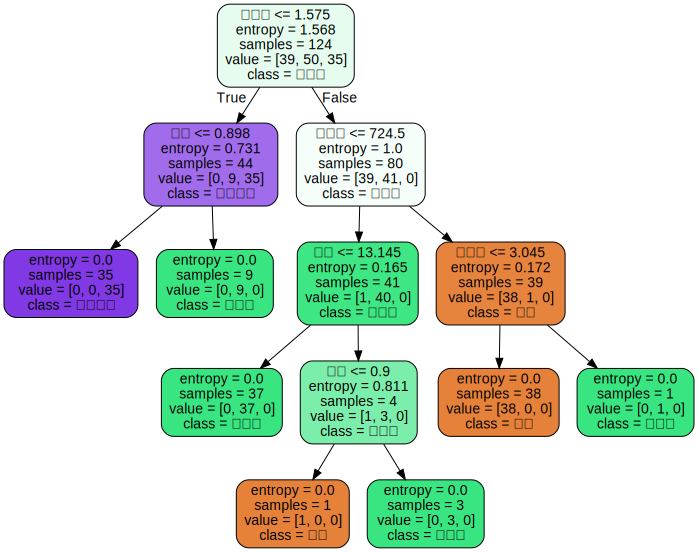

In [5]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮'
                ,'非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf
                                ,out_file= None                            #None选择不输出文件
                                ,feature_names = feature_name              #传入特征的名称
                                ,class_names=["茅台","五粮液","泸州老窖"]  #标签的名称
                                ,filled=True                              #不填充颜色
                                ,rounded=True                             #边框为圆形      
                               ) 

graph = graphviz.Source(dot_data)
graph


In [6]:
clf.feature_importances_                       #特征重要性
[ *zip(feature_name, clf.feature_importances_)] #把对应的元素打包成元组

[('酒精', 0.018189749534948833),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.42344027123866296),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.034500817931560075),
 ('颜色强度', 0.0),
 ('色调', 0.18206160206625188),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.3418075592285762)]

In [7]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state = 1912   #随机参数模式
                                   # ,splitter="random" 
                                    )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9629629629629629

In [8]:
clf = tree.DecisionTreeClassifier(criterion = "entropy"
                                   # ,random_state = 1912   #随机参数模式
                                    ,splitter = "random" 
                                    )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9074074074074074

In [9]:
file = r'D:\新建文件夹'

0.8888888888888888


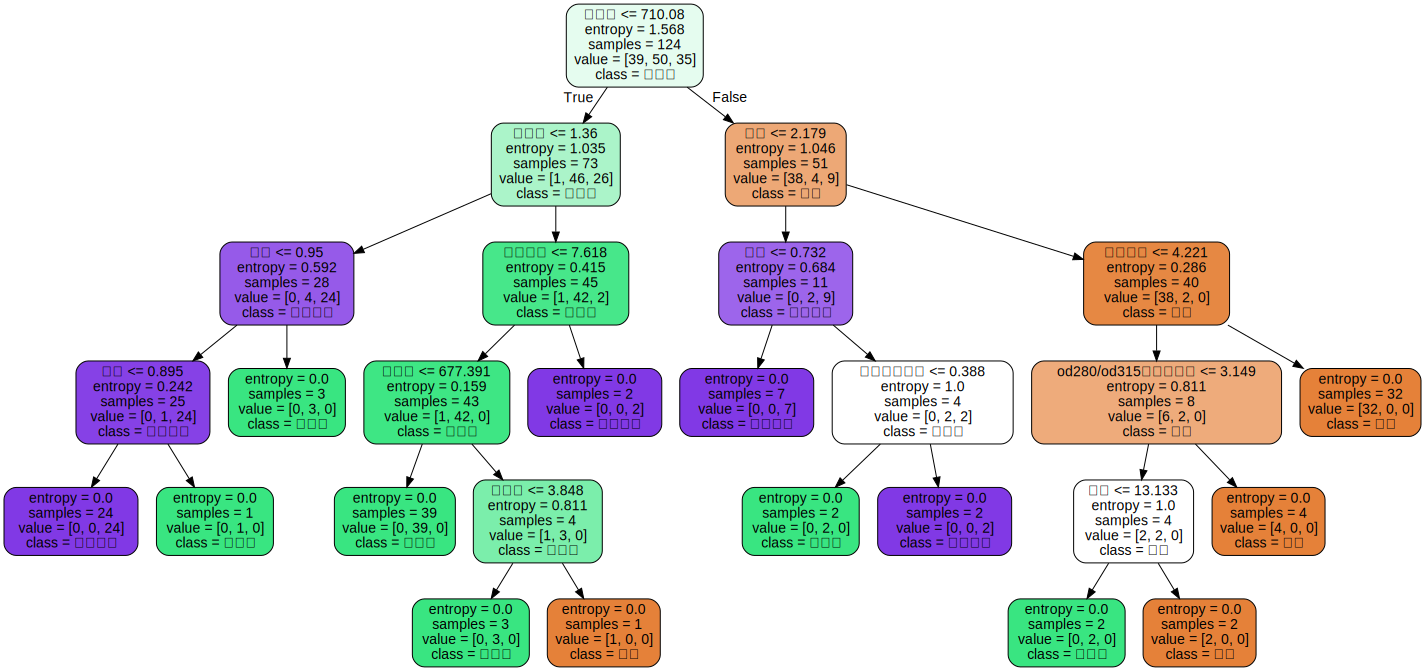

In [10]:
clf = tree.DecisionTreeClassifier(criterion = "entropy"
                                    ,random_state = 1912   #随机参数模式
                                    ,splitter = "random" 
                                    )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
print(score)

dot_data = tree.export_graphviz(clf
                                ,out_file =  None                   #None选择不输出文件
                                ,feature_names = feature_name      #传入特征的名称
                                ,class_names=["茅台","五粮液","泸州老窖"] #标签的名称
                                ,filled=True                        #不填充颜色
                                ,rounded=True                       #边框为圆形                       
                               ) 

graph = graphviz.Source(dot_data)
                        
                       
graph

In [11]:

#决策树对训练集的拟合程度
score_train = clf.score(Xtrain, Ytrain)
score_train




1.0

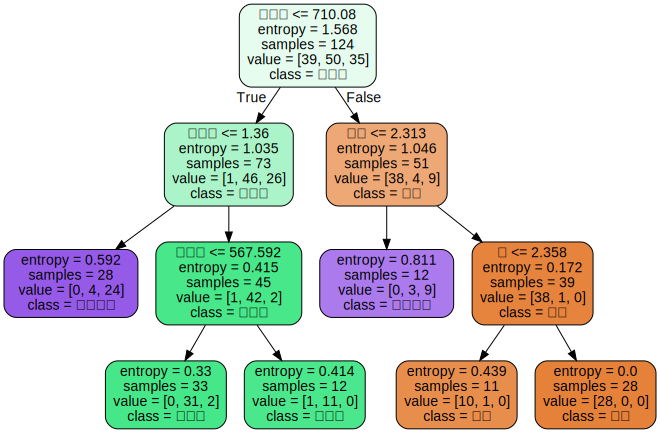

In [12]:

clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=1912
                                    ,splitter="random"
                                    ,max_depth=3
                                    ,min_samples_leaf=10
                                    ,min_samples_split=30
                                )
clf = clf.fit(Xtrain, Ytrain)

dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["茅台","五粮液","泸州老窖"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph



In [13]:
score = clf.score(Xtest, Ytest)
score

0.8518518518518519

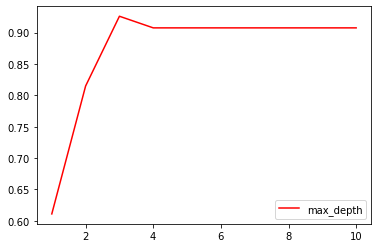

In [14]:

import matplotlib.pyplot as plt
%matplotlib inline

test = []                                                      #先指定test为空list，用以承装后续计算出的score值
for i in range(10):                                           #python通过相同缩进了识别代码块
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)                                         #在列表末尾增加新的对象
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()                                                   #图例，图中max_depth
plt.show()




In [15]:
clf.feature_importances_

array([0.23657834, 0.        , 0.        , 0.        , 0.        ,
       0.0255348 , 0.43538253, 0.        , 0.        , 0.        ,
       0.06848786, 0.17473313, 0.05928334])

In [16]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([13, 13, 16,  7,  7, 16, 11, 13, 16, 16, 16,  4, 16, 13, 11, 16, 13,
       16,  4, 11,  4,  8,  4,  4,  8, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        7,  7, 11, 16, 16, 16,  4,  7, 11, 16,  8, 11, 16, 11,  4, 11,  7,
       11,  4,  8], dtype=int64)

In [17]:
#predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       1, 1, 0, 1, 2, 1, 2, 1, 2, 1])

## 回归树

In [18]:

from sklearn.datasets import load_boston                #导入load_boston函数，用于导入波士顿房价数据
from sklearn.model_selection import cross_val_score     #从模型选择模块中导入交叉验证分数函数
from sklearn.tree import DecisionTreeRegressor          #从树模块中导入回归树

boston = load_boston()                                   #导入波士顿房价数据

regressor = DecisionTreeRegressor(random_state = 1912)   #实例化

cross_val_score(regressor, boston.data, boston.target    
                ,cv = 10                                 #交叉验证平均分为10份
                ,scoring = "neg_mean_squared_error"      #返回均方误差
               )




array([ -16.82980392,   -9.5227451 ,  -17.79352941,  -94.41117647,
        -15.61313725,  -42.12843137,  -18.5308    , -101.5814    ,
        -55.5878    ,  -38.1094    ])

In [19]:
boston = load_boston()

In [20]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [21]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [22]:
regressor = DecisionTreeRegressor(random_state= 1912)
cross_val_score(regressor, boston.data, boston.target, cv = 10
               ,scoring = "neg_mean_squared_error"
           )

array([ -16.82980392,   -9.5227451 ,  -17.79352941,  -94.41117647,
        -15.61313725,  -42.12843137,  -18.5308    , -101.5814    ,
        -55.5878    ,  -38.1094    ])

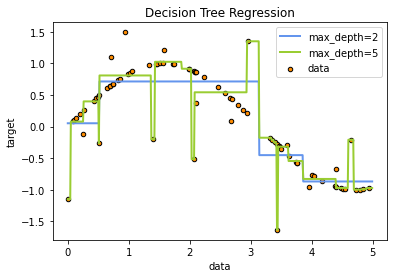

In [23]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 创建随机数
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# 拟合模型
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# 预测
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# 画出结果
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()